In [280]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeClassifier


In [281]:
crime = pd.read_csv('/Users/Allison/desktop/sfdat22/notebooks/train.csv')

In [282]:
crime.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


To prepare the data, I'll index by the date and parse the date into more applicable features like day of week, hour of day, etc. I'll also add in some columns to make a location out of lat and long coordinates to add in some columns to calculate the distance from other key locations. Based on secondary research, the SFPD asserts that most drugs are brought into the city via Bart, so I want to see if there is a correlation between the distance from Bart stations and the category (or quantity) of crime committed. I am also curious if more crime is enforced near the police station for the district, so I'll add a column to calculate the distance from the police station.

In [283]:
#convert the date to a datetime
crime["Dates"] = pd.to_datetime(crime["Dates"])
crime.set_index("Dates", inplace=True)

In [284]:
#Index the date features
crime['Year'] = crime.index.year
crime['Month'] = crime.index.month
crime['Day'] = crime.index.dayofweek
crime['Hour'] = crime.index.hour
crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour
Dates,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,2,23
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,2,23
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,2,23


In [285]:
# create a new column based on the hour where 1 is pm and 0 is am
crime['morning'] = crime['Hour'].apply(lambda x: 1 if x > 11 else 0)
crime.head(2)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,morning
Dates,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1


In [244]:
#Add a column to determine weekend or weekday
crime['Weekend'] = crime.DayOfWeek.map({'Monday':0, 'Tuesday':0, 'Wednesday':0, 'Thursday':0, 'Friday':0, 'Saturday':1, 'Sunday':1})
crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,morning,Weekend
Dates,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1,0
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1,0
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,2,23,1,0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,2,23,1,0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,2,23,1,0


In [286]:
#Add a location with lat and long coordinates, (X is longitude and Y is latitude)
crime.head()
crime['Location'] = zip(crime['Y'], crime['X'])
crime.head(2)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,morning,Location
Dates,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1,"(37.7745985957, -122.425891675)"
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1,"(37.7745985957, -122.425891675)"


In [287]:
#add distances from nearby bart stations and test to see if vincenty distance function seems accurate. (Within 1 mile of the google maps distance)
from geopy.distance import vincenty
# balboa_bart = (37.7216, -122.4475)
civic_bart = (37.7799, -122.4135)
# glen_park = (37.7331, -122.4338)
# mission_24th = (37.7525, -122.4181)
mission_16th = (37.7648, -122.42)
powell_bart = (37.7845, -122.408)
# montgomery_bart = (37.7894, -122.4011)
# embarcadero_bart = (37.7929, -122.3971)
vincenty(civic_bart, powell_bart).miles

0.4373589691660568

In [288]:
#add distance from the Tenderloin police station
police_station = (37.7836111, -122.4127778)
vincenty(civic_bart, police_station).miles

0.25898002110602475

In [289]:
#add columns for distance from bart and police station
crime['Civic_Bart'] = crime['Location'].apply(lambda x: vincenty(x, civic_bart).miles)
crime['mission_16th'] = crime['Location'].apply(lambda x: vincenty(x, mission_16th).miles)
crime['powell_bart'] = crime['Location'].apply(lambda x: vincenty(x, powell_bart).miles)
crime['police_station'] = crime['Location'].apply(lambda x: vincenty(x, police_station).miles)
crime.head(2)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,morning,Location,Civic_Bart,mission_16th,powell_bart,police_station
Dates,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1,"(37.7745985957, -122.425891675)",0.770597,0.748813,1.193946,0.949557
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1,"(37.7745985957, -122.425891675)",0.770597,0.748813,1.193946,0.949557


In [290]:
#create a column for distance within a block or two of Civic Center Bart
crime['CCBart_nearest'] = crime['Civic_Bart'].apply(lambda x: 1 if x < 0.2 else 0)
crime['police_nearest'] = crime['police_station'].apply(lambda x: 1 if x < 0.2 else 0)
crime.head(2)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,morning,Location,Civic_Bart,mission_16th,powell_bart,police_station,CCBart_nearest,police_nearest
Dates,,,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1,"(37.7745985957, -122.425891675)",0.770597,0.748813,1.193946,0.949557,0,0
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,1,"(37.7745985957, -122.425891675)",0.770597,0.748813,1.193946,0.949557,0,0


In [291]:
crime.columns

Index([u'Category', u'Descript', u'DayOfWeek', u'PdDistrict', u'Resolution',
       u'Address', u'X', u'Y', u'Year', u'Month', u'Day', u'Hour', u'morning',
       u'Location', u'Civic_Bart', u'mission_16th', u'powell_bart',
       u'police_station', u'CCBart_nearest', u'police_nearest'],
      dtype='object')

In [296]:
#I want to examine crime in the Tenderloin specifically, so I created a new dataframe filtered to crime in the TL.
TL_crime = crime[crime.PdDistrict == 'TENDERLOIN'].copy()
TL_crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,morning,Location,Civic_Bart,mission_16th,powell_bart,police_station,CCBart_nearest,police_nearest
Dates,,,,,,,,,,,,,,,,,,,,
2015-05-13 22:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Wednesday,TENDERLOIN,NONE,TURK ST / JONES ST,-122.412414,37.783004,2015,5,2,22,1,"(37.7830037965, -122.412414264)",0.222158,1.322365,0.262733,0.046371,0,1
2015-05-13 22:00:00,ROBBERY,"ROBBERY, ARMED WITH A KNIFE",Wednesday,TENDERLOIN,NONE,EDDY ST / JONES ST,-122.412597,37.783932,2015,5,2,22,1,"(37.7839320277, -122.412597377)",0.282434,1.380313,0.254673,0.024237,0,1
2015-05-13 21:30:00,NON-CRIMINAL,FOUND PROPERTY,Wednesday,TENDERLOIN,NONE,100 Block of JONES ST,-122.412250,37.782556,2015,5,2,21,1,"(37.7825563302, -122.412249768)",0.195565,1.296022,0.268478,0.078276,1,1
2015-05-13 21:11:00,WARRANTS,WARRANT ARREST,Wednesday,TENDERLOIN,NONE,100 Block of JONES ST,-122.412250,37.782556,2015,5,2,21,1,"(37.7825563302, -122.412249768)",0.195565,1.296022,0.268478,0.078276,1,1
2015-05-13 21:11:00,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Wednesday,TENDERLOIN,NONE,100 Block of JONES ST,-122.412250,37.782556,2015,5,2,21,1,"(37.7825563302, -122.412249768)",0.195565,1.296022,0.268478,0.078276,1,1


In [162]:
#Exploratory Analysis: Just looking at crimes by category
TL_crime.groupby('Category').Category.value_counts().sort_values(ascending=False)

Category  Category
8         8           11177
4         4            9237
2         2            6941
7         7            6823
3         3            5366
6         6            2386
1         1            1977
0         0            1502
13        13           1236
17        17            970
16        16            938
5         5             835
25        25            795
20        20            787
11        11            607
14        14            528
23        23            480
10        10            428
21        21            307
12        12            298
9         9             209
29        29            184
15        15            177
19        19            139
31        31            125
24        24             89
18        18             58
27        27             55
28        28             35
32        32             26
34        34             17
26        26             13
22        22              9
35        35              8
33        33              7
3

Data Visualiztions to show how crime category is distributed across day, hour, and location. 

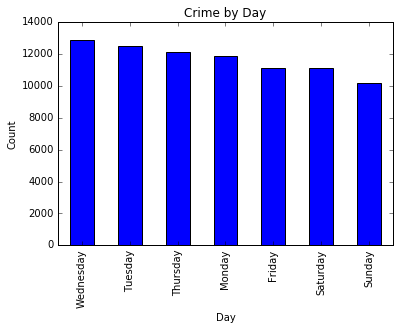

In [57]:
# Visualizing Crime by day of the week
TL_crime.DayOfWeek.value_counts().plot(kind='bar', title='Crime by Day')
plt.xlabel('Day')
plt.ylabel('Count')

In [165]:
#Crime by category in the TL

TL_crime.groupby('Category').Category.value_counts().sort_values(ascending=False)

Category                     Category                   
DRUG/NARCOTIC                DRUG/NARCOTIC                  17696
OTHER OFFENSES               OTHER OFFENSES                 13724
LARCENY/THEFT                LARCENY/THEFT                   9903
ASSAULT                      ASSAULT                         7679
NON-CRIMINAL                 NON-CRIMINAL                    7467
WARRANTS                     WARRANTS                        7326
SUSPICIOUS OCC               SUSPICIOUS OCC                  2513
ROBBERY                      ROBBERY                         2202
VANDALISM                    VANDALISM                       1616
BURGLARY                     BURGLARY                        1488
TRESPASS                     TRESPASS                        1192
FRAUD                        FRAUD                           1130
VEHICLE THEFT                VEHICLE THEFT                   1006
PROSTITUTION                 PROSTITUTION                     904
DISORDERLY CONDUCT 

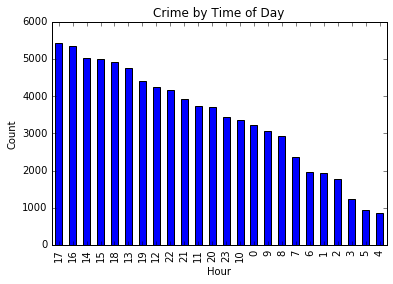

In [21]:
# visualizing crime by hour
TL_crime.Hour.value_counts().plot(kind='bar', title='Crime by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Count')

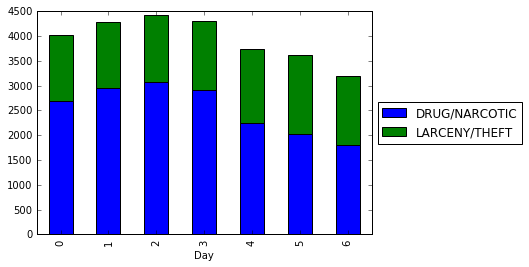

In [36]:
#Trends in the most common crime categories
df2 = TL_crime[TL_crime['Category'].isin(['DRUG/NARCOTIC', 'LARCENY/THEFT'])].groupby('Day')['Category'].value_counts().unstack('Category').fillna(0)
df2.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

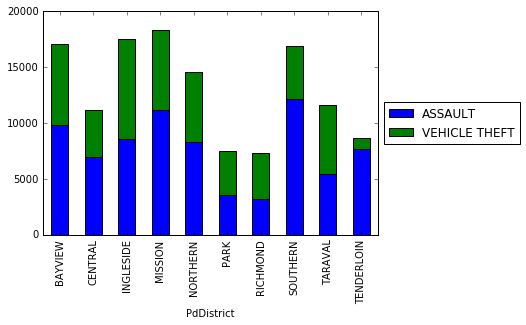

In [11]:
# Trends in other districts
df2 = crime[crime['Category'].isin(['VEHICLE THEFT', 'ASSAULT'])].groupby('PdDistrict')['Category'].value_counts().unstack('Category').fillna(0)
df2.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

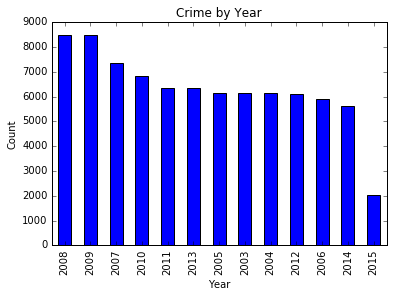

In [28]:
# df2 = DataFrame(rand(10, 4), columns=['a', 'b', 'c', 'd'])
# df2.plot(kind='bar')

# visualizing crime by year
TL_crime.Year.value_counts().plot(kind='bar', title='Crime by Year')
plt.xlabel('Year')
plt.ylabel('Count')

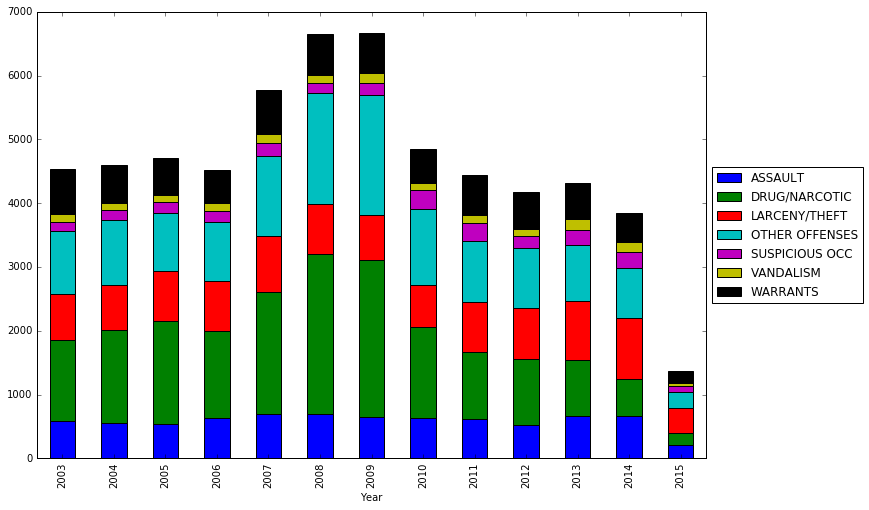

In [38]:
df2 = TL_crime[TL_crime['Category'].isin(['DRUG/NARCOTIC', 'LARCENY/THEFT', 'OTHER OFFENSES', 'ASSAULT', 'NON CRIMINAL', 'WARRANTS', 'SUSPICIOUS OCC', 'VANDALISM'])].groupby('Year')['Category'].value_counts().unstack('Category').fillna(0)
df2.plot(kind='bar', figsize=(12,8), stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [252]:
TL_crime.columns

Index([u'Category', u'Descript', u'DayOfWeek', u'PdDistrict', u'Resolution',
       u'Address', u'X', u'Y', u'Year', u'Month', u'Day', u'Hour', u'morning',
       u'Weekend', u'Location', u'Civic_Bart', u'mission_16th', u'powell_bart',
       u'police_station', u'CCBart_nearest', u'police_nearest'],
      dtype='object')

In [26]:
#Examining category=Other because it contains such a wide range of crimes.
# TL_crime[TL_crime.Category=='OTHER OFFENSES'].groupby('Year').Year.value_counts()

# TL_other = TL_crime[TL_crime.Category=='LARCENY/THEFT']
# TL_other.groupby('Descript').Descript.value_counts()
 

Year  Year
2003  2003     993
2004  2004    1021
2005  2005     906
2006  2006     925
2007  2007    1260
2008  2008    1728
2009  2009    1880
2010  2010    1194
2011  2011     952
2012  2012     941
2013  2013     881
2014  2014     784
2015  2015     259
dtype: int64

In [21]:
#Looking at crimes on the weekend 
Weekend_crimes = TL_crime[TL_crime.Weekend==1]
Weekend_crimes.groupby('Category').Category.value_counts().sort_values()

Category                     Category                   
GAMBLING                     GAMBLING                          1
BAD CHECKS                   BAD CHECKS                        2
EXTORTION                    EXTORTION                         3
BRIBERY                      BRIBERY                           7
FAMILY OFFENSES              FAMILY OFFENSES                   9
SUICIDE                      SUICIDE                          10
ARSON                        ARSON                            15
EMBEZZLEMENT                 EMBEZZLEMENT                     17
RECOVERED VEHICLE            RECOVERED VEHICLE                27
DRIVING UNDER THE INFLUENCE  DRIVING UNDER THE INFLUENCE      33
LOITERING                    LOITERING                        52
LIQUOR LAWS                  LIQUOR LAWS                      62
KIDNAPPING                   KIDNAPPING                       69
PROSTITUTION                 PROSTITUTION                     74
STOLEN PROPERTY              STOL

In [12]:
#Examining Crime on the weekend days
TL_crime.groupby('Weekend').Category.value_counts()

Weekend  Category                   
0        DRUG/NARCOTIC                  13868
         OTHER OFFENSES                 10260
         LARCENY/THEFT                   6915
         WARRANTS                        5535
         NON-CRIMINAL                    5421
         ASSAULT                         5353
         SUSPICIOUS OCC                  1822
         ROBBERY                         1567
         VANDALISM                       1119
         BURGLARY                        1073
         TRESPASS                         892
         PROSTITUTION                     830
         FRAUD                            799
         VEHICLE THEFT                    707
         MISSING PERSON                   644
         DISORDERLY CONDUCT               634
         WEAPON LAWS                      591
         SECONDARY CODES                  478
         FORGERY/COUNTERFEITING           442
         DRUNKENNESS                      297
         STOLEN PROPERTY                  2

In [297]:
TL_crime = TL_crime.drop(TL_crime[TL_crime.Category == 'OTHER OFFENSES'].index)
TL_crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,morning,Location,Civic_Bart,mission_16th,powell_bart,police_station,CCBart_nearest,police_nearest
Dates,,,,,,,,,,,,,,,,,,,,
2015-05-13 22:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Wednesday,TENDERLOIN,NONE,TURK ST / JONES ST,-122.412414,37.783004,2015,5,2,22,1,"(37.7830037965, -122.412414264)",0.222158,1.322365,0.262733,0.046371,0,1
2015-05-13 22:00:00,ROBBERY,"ROBBERY, ARMED WITH A KNIFE",Wednesday,TENDERLOIN,NONE,EDDY ST / JONES ST,-122.412597,37.783932,2015,5,2,22,1,"(37.7839320277, -122.412597377)",0.282434,1.380313,0.254673,0.024237,0,1
2015-05-13 21:30:00,NON-CRIMINAL,FOUND PROPERTY,Wednesday,TENDERLOIN,NONE,100 Block of JONES ST,-122.412250,37.782556,2015,5,2,21,1,"(37.7825563302, -122.412249768)",0.195565,1.296022,0.268478,0.078276,1,1
2015-05-13 21:11:00,WARRANTS,WARRANT ARREST,Wednesday,TENDERLOIN,NONE,100 Block of JONES ST,-122.412250,37.782556,2015,5,2,21,1,"(37.7825563302, -122.412249768)",0.195565,1.296022,0.268478,0.078276,1,1
2015-05-13 21:11:00,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Wednesday,TENDERLOIN,NONE,100 Block of JONES ST,-122.412250,37.782556,2015,5,2,21,1,"(37.7825563302, -122.412249768)",0.195565,1.296022,0.268478,0.078276,1,1


In [298]:
TL_crime.columns

Index([u'Category', u'Descript', u'DayOfWeek', u'PdDistrict', u'Resolution',
       u'Address', u'X', u'Y', u'Year', u'Month', u'Day', u'Hour', u'morning',
       u'Location', u'Civic_Bart', u'mission_16th', u'powell_bart',
       u'police_station', u'CCBart_nearest', u'police_nearest'],
      dtype='object')

In [187]:
TL_crime.shape

(54784, 21)

In [299]:
#There are some rows with incorrect coordinates. These points all have lat,long coordinates of (90,-120.5)
TL_crime = TL_crime.drop(TL_crime[TL_crime.Y ==90.000000].index)
                                  

In [300]:
TL_crime.columns

Index([u'Category', u'Descript', u'DayOfWeek', u'PdDistrict', u'Resolution',
       u'Address', u'X', u'Y', u'Year', u'Month', u'Day', u'Hour', u'morning',
       u'Location', u'Civic_Bart', u'mission_16th', u'powell_bart',
       u'police_station', u'CCBart_nearest', u'police_nearest'],
      dtype='object')

In [189]:
#double check that all X values seem normal after dropping Y=90
TL_crime.X.describe()

count    54772.000000
mean      -122.412360
std          0.003013
min       -122.469632
25%       -122.414593
50%       -122.412784
75%       -122.410157
max       -122.404588
Name: X, dtype: float64

In [190]:
#import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# Count vectorizer documentation for reference
# CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
#         dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
#         lowercase=True, max_df=1.0, max_features=None, min_df=1,
#         ngram_range=(1, 1), preprocessor=None, stop_words=None,
#         strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
#         tokenizer=None, vocabulary=None)

In [110]:
# define X and y
TL_text = TL_crime[['Address', 'Category']]

X = TL_text.Address
y = TL_text.Category
print y.value_counts()

# # split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

8     11177
4      9237
2      6941
7      6823
3      5366
6      2386
1      1977
0      1502
13     1236
17      970
16      938
5       835
25      795
20      787
11      607
14      528
23      480
10      428
21      307
12      298
9       209
29      184
15      177
19      139
31      125
24       89
18       58
27       55
28       35
32       26
34       17
26       13
22        9
35        8
33        7
30        3
Name: Category, dtype: int64


In [45]:
# use CountVectorizer to create document-term matrices from X_train and X_test
stop_words = ['ST', 'AV', 'Block', 'of','WY','BL','CT','st','ct', 'pl', 'pz', 'av', 'block', 'ada']
vect = CountVectorizer(analyzer='word', decode_error='ignore', max_features=300, stop_words=stop_words)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [46]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(41088, 57)

In [47]:
print vect.get_feature_names()[-63:]

[u'100', u'1000', u'1200', u'1400', u'1500', u'200', u'300', u'3700', u'400', u'500', u'5thstnorth', u'600', u'700', u'7thstnorth', u'8th', u'9th', u'antonio', u'breen', u'brenham', u'bush', u'charles', u'cohen', u'cyril', u'dodge', u'eddy', u'ellis', u'elwood', u'fulton', u'gate', u'geary', u'golden', u'grant', u'grove', u'hayes', u'hyde', u'ingalls', u'jennings', u'jones', u'larkin', u'leavenworth', u'magnin', u'market', u'mason', u'mcallister', u'nations', u'ofarrell', u'plorth', u'post', u'powell', u'shannon', u'steveloe', u'stockton', u'storth', u'taylor', u'turk', u'united', u'unitednations']


In [48]:

# create document-term matrices :: only single words
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use logistic regression with text column only
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)

# calculate accuracy - the accuracy is not great
print metrics.accuracy_score(y_test, y_pred_class)

0.310309579439


In [49]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print 'Features: ', X_train_dtm.shape[1]
    X_test_dtm = vect.transform(X_test)
    logreg = LogisticRegression()
    logreg.fit(X_train_dtm, y_train)
    y_pred_class = logreg.predict(X_test_dtm)
    print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

In [50]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  197
Accuracy:  0.316880841121


In [51]:
#try setting max features - makes it worse! 
vect = CountVectorizer(max_features=100)
tokenize_test(vect)

Features:  65
Accuracy:  0.310163551402


In [53]:
tf = pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())
tf.describe()

,100,1000,1200,1400,1500,200,300,3700,400,500,...,pz,shannon,st,steveloe,stockton,storth,taylor,turk,united,unitednations
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,...,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,0.175136,0.000195,0.000122,0.000389,0.000073,0.100151,0.111833,0.000073,0.095210,0.046291,...,0.016550,0.001193,1.158635,0.000608,0.024679,0.001363,0.066321,0.150141,0.002872,0.013678
std,0.380088,0.013952,0.011031,0.019730,0.008545,0.300205,0.315165,0.008545,0.293509,0.210117,...,0.127579,0.034513,0.510222,0.024660,0.155146,0.036893,0.248846,0.357214,0.053514,0.116152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# create a document-term matrix using TF-IDF
dtm = vect.fit_transform(TL_text.Address)
features = vect.get_feature_names()
dtm.shape

(54784, 67)

Now I will try using a decision tree to predict the category of crime

In [254]:
#factorize Category for the decision tree in a new data frame
TL_crime['Category'] = pd.factorize(TL_crime.Category)[0]
TL_crime.head(2)

/Users/Allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,...,Hour,morning,Weekend,Location,Civic_Bart,mission_16th,powell_bart,police_station,CCBart_nearest,police_nearest
Dates,,,,,,,,,,,,,,,,,,,,,
2015-05-13 22:30:00,0,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Wednesday,TENDERLOIN,NONE,TURK ST / JONES ST,-122.412414,37.783004,2015,5,...,22,1,0,"(37.7830037965, -122.412414264)",0.222158,1.322365,0.262733,0.046371,0,1
2015-05-13 22:00:00,1,"ROBBERY, ARMED WITH A KNIFE",Wednesday,TENDERLOIN,NONE,EDDY ST / JONES ST,-122.412597,37.783932,2015,5,...,22,1,0,"(37.7839320277, -122.412597377)",0.282434,1.380313,0.254673,0.024237,0,1


In [122]:
#Looking at the distances from Civic Center Bart
TL_crime.Civic_Bart.describe()

count    54772.000000
mean         0.323815
std          0.140840
min          0.039911
25%          0.220751
50%          0.312483
75%          0.407139
max          3.107541
Name: Civic_Bart, dtype: float64

In [123]:
#Looking at the distances from the police station
TL_crime.police_station.describe()

count    54772.000000
mean         0.185618
std          0.106045
min          0.014876
25%          0.108868
50%          0.160803
75%          0.243185
max          3.194318
Name: police_station, dtype: float64

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfreg = RandomForestClassifier()

In [237]:
TL_crime.columns

Index([u'Category', u'Descript', u'DayOfWeek', u'PdDistrict', u'Resolution',
       u'Address', u'X', u'Y', u'Year', u'Month', u'Day', u'Hour', u'morning',
       u'Location', u'Civic_Bart', u'mission_16th', u'powell_bart',
       u'police_station', u'CCBart_nearest', u'police_nearest'],
      dtype='object')

In [303]:
feature_cols=['Civic_Bart', 'mission_16th', 'powell_bart','morning', 'police_station', 'police_nearest']
# feature_cols=['Civic_Bart', 'police_station', 'Hour']
# feature_cols=['Civic_Bart', 'mission_16th', 'powell_bart','morning', 'police_station', 'Hour', 'Weekend']
# feature_cols = 

In [304]:
# define X and y
X = TL_crime[feature_cols]
y = TL_crime.Category




In [305]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [277]:
# list of values to try for max_depth
max_depth_range = range(1, 20)

# list to store the average accuracy for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    print depth
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(treeclf, X, y, cv=5, scoring='accuracy').mean())

1


/Users/Allison/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[0.27244174001837651,
 0.27300456884500079,
 0.278185823392881,
 0.2896641325039564,
 0.29406453842607644,
 0.2963393308795591,
 0.29734172528899822,
 0.29825834222699854,
 0.2996283291560069,
 0.29895648616647741,
 0.29696486859043741,
 0.29734338423751822,
 0.29344200452606212,
 0.28804063483967368,
 0.28621975323286292,
 0.28177024430090986,
 0.27873911114506605,
 0.27642897323368459,
 0.27531663712118137]

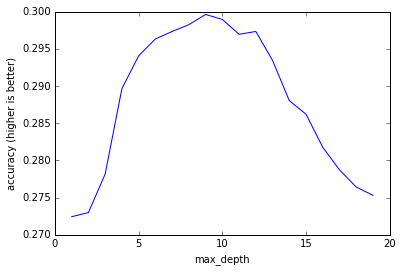

In [306]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy (higher is better)')
accuracy_scores

In [268]:
# show the best accuracy and the corresponding max_depth
# sorted(zip(accuracy_scores, max_depth_range))[0]
sorted(zip(accuracy_scores, max_depth_range))

[(0.27967420188393105, 1),
 (0.28208549099170371, 2),
 (0.29216404144280811, 3),
 (0.29817405646049489, 19),
 (0.30058247243025527, 18),
 (0.30312153505064715, 17),
 (0.30709467211743702, 4),
 (0.3073023490713212, 16),
 (0.31164727725767222, 15),
 (0.31434747334580615, 14),
 (0.31536768881224314, 5),
 (0.31937066295483979, 13),
 (0.32007944468107236, 6),
 (0.32205284086997976, 7),
 (0.32323987352434375, 12),
 (0.32477325422552777, 8),
 (0.32716274256613281, 10),
 (0.32734863643085083, 11),
 (0.33017613186563943, 9)]

In [269]:
# max_depth=9 was best, so fit a tree using that parameter
treeclf = DecisionTreeClassifier(max_depth=9, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [270]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort('importance')

/Users/Allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,feature,importance
3,morning,0.001821
6,Weekend,0.022006
1,mission_16th,0.046991
2,powell_bart,0.095126
5,Hour,0.165495
4,police_station,0.195046
0,Civic_Bart,0.473514
